# **Stock Price Prediction  Facebook Prophet**

In [ ]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import prophet


# **APPLE price prediction using facebook Prophet**

## Load EDA libraries


In [ ]:
##  https://www.youtube.com/watch?v=AX1wKnBPhvU
## https://www.viralml.com/video-content.html?v=AX1wKnBPhvU

## https://www.youtube.com/watch?v=95-HMzxsghY&t=689s
## https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
## Load the data
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-06-22')

In [ ]:
## Get the number of rows and columns
df = df.reset_index()

In [ ]:
df.shape, df.tail(), df.columns

((2131, 7),
            Date        High         Low  ...       Close      Volume   Adj Close
 2126 2020-06-16  353.200012  344.720001  ...  352.079987  41357200.0  351.446320
 2127 2020-06-17  355.399994  351.089996  ...  351.589996  28532000.0  350.957214
 2128 2020-06-18  353.450012  349.220001  ...  351.730011  24205100.0  351.096985
 2129 2020-06-19  356.559998  345.149994  ...  349.720001  66119000.0  349.090576
 2130 2020-06-22  359.459991  351.149994  ...  358.869995  33861300.0  358.224121
 
 [5 rows x 7 columns],
 Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'))

In [ ]:
df = df.filter(['Date','Close'])
df.head()

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2131 non-null   datetime64[ns]
 1   Close   2131 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.4 KB


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.head()

In [ ]:
# To filter negative values
df.index[df['Close'] < 0]

Int64Index([], dtype='int64')

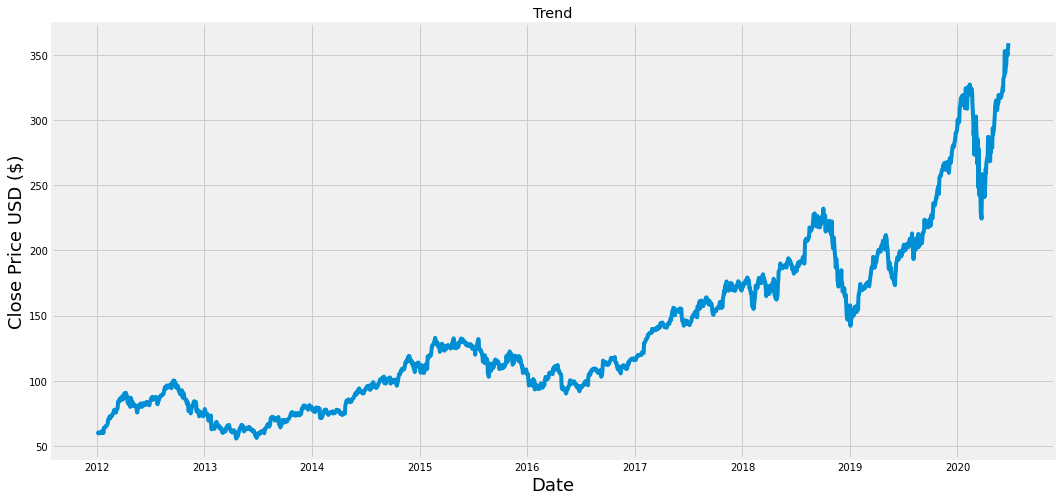

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1) 
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

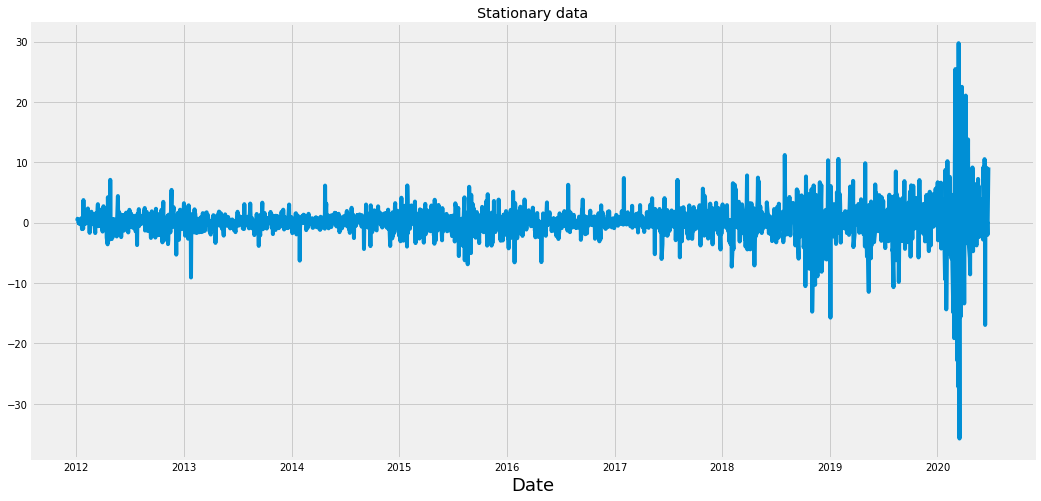

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

Now, the above graph looks stationary

In [ ]:
from fbprophet import Prophet

## Initialize the model

In [ ]:
model = Prophet()

**Paremeters**


*   growth: linear/logistic
*   seasonality:additive/multiplicative
*   holidays:
*   changepoint







In [ ]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [ ]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Close_shift':'y'})#, inplace=True)

In [ ]:
df_pht.head()

,ds,Close,y
0,2012-01-03,58.747143,NaN
1,2012-01-04,59.062859,0.315716
2,2012-01-05,59.718571,0.655712
3,2012-01-06,60.342857,0.624287
4,2012-01-09,60.247143,-0.095715


In [ ]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

1704

In [ ]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds      Close         y
 0 2012-01-03  58.747143       NaN
 1 2012-01-04  59.062859  0.315716
 2 2012-01-05  59.718571  0.655712
 3 2012-01-06  60.342857  0.624287
 4 2012-01-09  60.247143 -0.095715, (1704, 3))

## Fit our Model to our Data

In [ ]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
periods = len(df)-len(df_train)
periods

427

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [ ]:
# Shape after adding 401 days
future_dates.shape

(2131, 1)

In [ ]:
future_dates.head()

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09


In [ ]:
# Make Prediction 
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,0.066182,-1.982881,2.303880,0.066182,0.066182,-0.043156,-0.043156,-0.043156,-0.032421,-0.032421,-0.032421,-0.010735,-0.010735,-0.010735,0.0,0.0,0.0,0.023026
1,2012-01-04,0.066233,-2.215855,2.126373,0.066233,0.066233,-0.021546,-0.021546,-0.021546,-0.016136,-0.016136,-0.016136,-0.005410,-0.005410,-0.005410,0.0,0.0,0.0,0.044687
2,2012-01-05,0.066284,-2.318947,2.037288,0.066284,0.066284,-0.201262,-0.201262,-0.201262,-0.196022,-0.196022,-0.196022,-0.005241,-0.005241,-0.005241,0.0,0.0,0.0,-0.134979
3,2012-01-06,0.066335,-2.376324,1.996794,0.066335,0.066335,-0.247064,-0.247064,-0.247064,-0.236892,-0.236892,-0.236892,-0.010172,-0.010172,-0.010172,0.0,0.0,0.0,-0.180729
4,2012-01-09,0.066488,-1.775452,2.515076,0.066488,0.066488,0.179245,0.179245,0.179245,0.232030,0.232030,0.232030,-0.052785,-0.052785,-0.052785,0.0,0.0,0.0,0.245733


**Narrative**


*   yhat : the predicted forecast
*   yhat_lower : the lower border of the prediction

*   yhat_upper: the upper border of the prediction





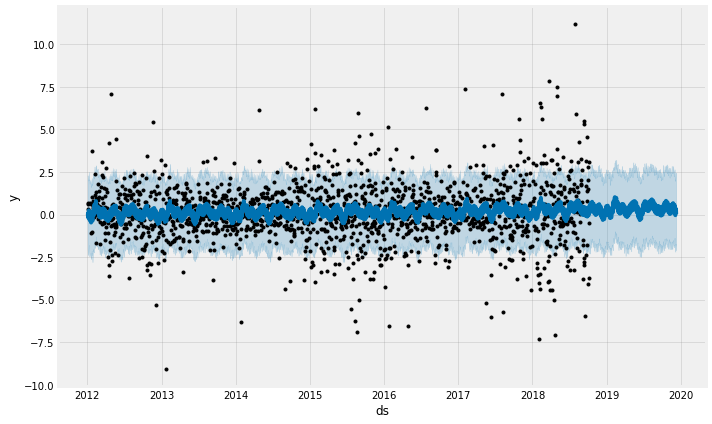

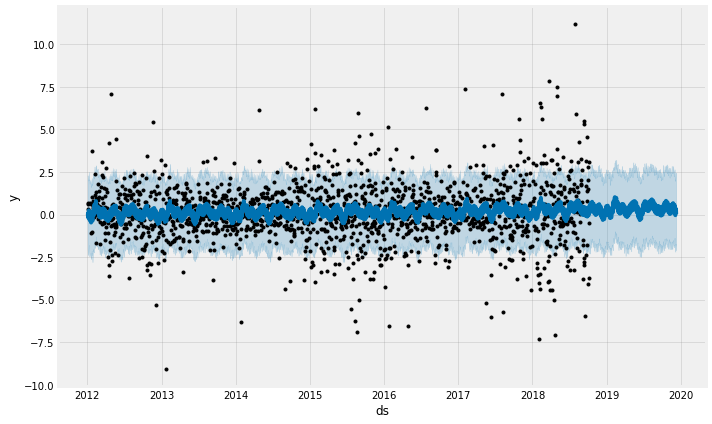

In [ ]:
# Plot Our Predictions
model.plot(prediction)

**Narrative**

*   A Trending data
*   Black dots : the actual data points in our dataset.

*   Deep blue line : the predicted forecast/the predicted values
*   Light blue line : the boundaries





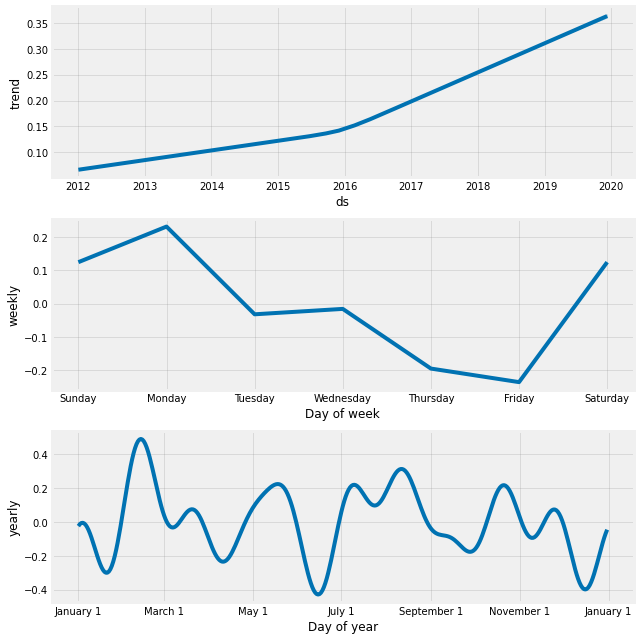

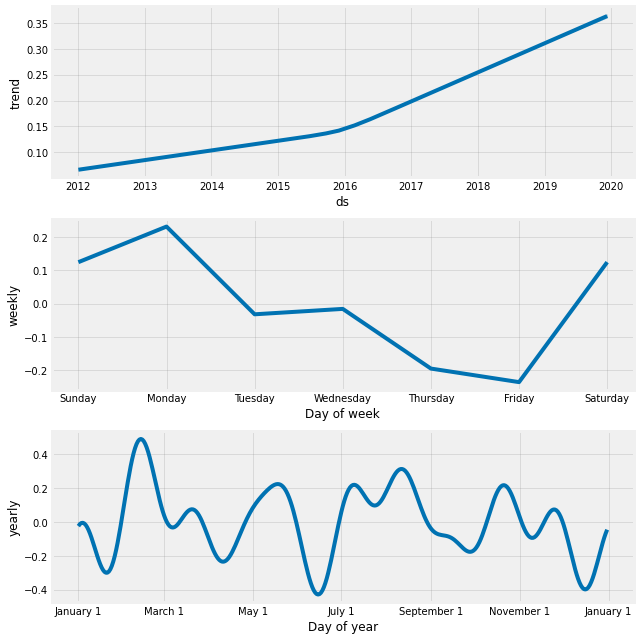

In [ ]:
model.plot_components(prediction)

**Cross Validation**

*   For measuring forecast error by comparing the predicted values with the actual values

*   initial:the size of the initial training period

*   period : the spacing between cutoff dates
*   horizon : the forecast horizon((ds minus cutoff)


*   By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon



In [ ]:
# import cross_validation
from fbprophet.diagnostics import cross_validation

In [ ]:
df_train.shape, len(df)-len(df_train)

((1704, 3), 427)

In [ ]:
cv = cross_validation(model, initial='1704 days', period='1 days', horizon = '427 days')

INFO:fbprophet:Making 340 forecasts with cutoffs between 2016-09-03 00:00:00 and 2017-08-08 00:00:00


In [ ]:
cv.head(), cv.shape

(          ds      yhat  yhat_lower  yhat_upper         y     cutoff
 0 2016-09-06  0.073082   -1.916251    2.100914 -0.030006 2016-09-03
 1 2016-09-07  0.162875   -1.621402    2.116859  0.660004 2016-09-03
 2 2016-09-08  0.033376   -1.704417    1.942936 -2.840004 2016-09-03
 3 2016-09-09 -0.011035   -2.034882    2.021289 -2.389999 2016-09-03
 4 2016-09-12  0.415779   -1.682222    2.442419  2.310005 2016-09-03,
 (100084, 6))

**Performance Metrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:

df_train_pm = performance_metrics(cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_train_pm

,horizon,mse,rmse,mae,mdape,coverage
0,43 days,2.273129,1.507690,1.023846,0.987412,0.860196
1,44 days,2.275904,1.508610,1.024784,0.987412,0.859799
2,45 days,2.276496,1.508806,1.025436,0.987271,0.859595
3,46 days,2.277135,1.509018,1.026033,0.987271,0.859409
4,47 days,2.277633,1.509183,1.026562,0.986895,0.859174
...,...,...,...,...,...,...
380,423 days,6.142705,2.478448,1.822740,1.027217,0.652503
381,424 days,6.157890,2.481510,1.826021,1.027128,0.651422
382,425 days,6.172668,2.484485,1.829139,1.026875,0.650666
383,426 days,6.187751,2.487519,1.832347,1.026875,0.649980


## MSE & RMSE

In [ ]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(4.071566862335263, 1.9910531594027985)

**Visualizing Performance Metrics**

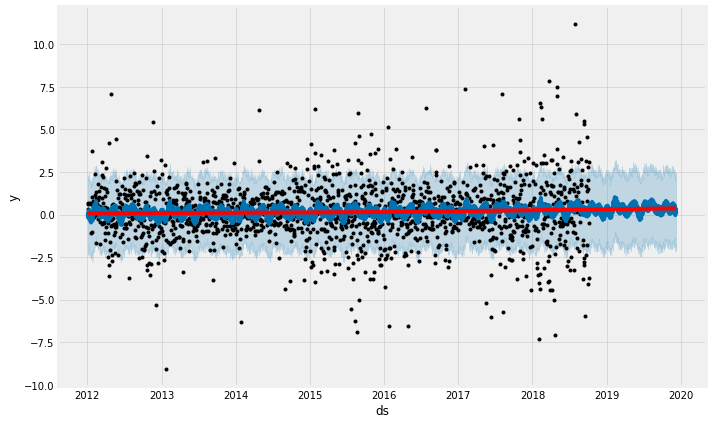

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

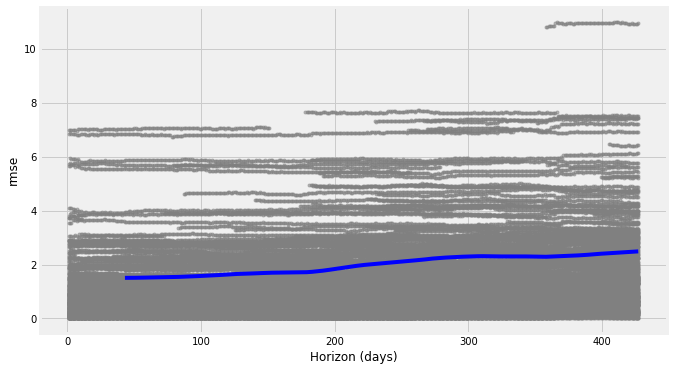

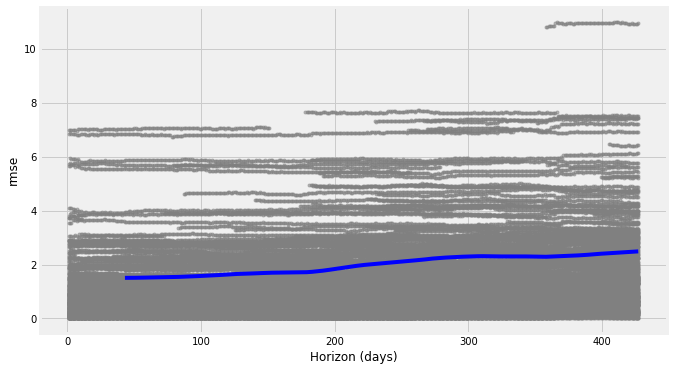

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')